# Анализ оттока пользователей из сети фитнес-центров

# Описание проекта
Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.

Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.

Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.

Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.
Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. Ваша задача — провести анализ и подготовить план действий по удержанию клиентов.

# Описание данных
<b>Таблица gym_churn:</b>
<br><br>
<b>Данные клиента за предыдущий до проверки факта оттока месяц:</b>
* gender — пол;
* Near_Location — проживание или работа в районе, где находится фитнес-центр;
* Partner — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
* Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
* Phone — наличие контактного телефона;
* Age — возраст;
* Lifetime — время с момента первого обращения в фитнес-центр (в месяцах).

<b>Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:</b>
* Contract_period — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
* Month_to_end_contract — срок до окончания текущего действующего абонемента (в месяцах);
* Group_visits — факт посещения групповых занятий;
* Avg_class_frequency_total — средняя частота посещений в неделю за все время с начала действия абонемента;
* Avg_class_frequency_current_month — средняя частота посещений в неделю за предыдущий месяц;
* Avg_additional_charges_total — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
* Churn — факт оттока в текущем месяце.

## Загрузка данных

In [1]:
# Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
import itertools
from sklearn.metrics import silhouette_score

In [2]:
# Загрузка данных
data = pd.read_csv('datasets/gym_churn.csv')

# Увеличение ширины колонки
pd.options.display.max_colwidth = 150

#Смотрим общую информацию
display(data.head())
print('Общая информация:')
data.info()
print()
print('Количество пропуков:')
print(round((data.isna().mean()*100),2))
print()
print('Количество полных дубликатов:', data.duplicated().sum())
print()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


Общая информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          400

В полученном датасете 4000 строк. Пропуски и полные дубликаты не обнаружены. 

In [3]:
# Приведем названия столбцов к нижнему регистру
data.columns = data.columns.str.lower()
# Изменение типа данных
data['month_to_end_contract'] = data['month_to_end_contract'].astype('int64')
data.dtypes

gender                                 int64
near_location                          int64
partner                                int64
promo_friends                          int64
phone                                  int64
contract_period                        int64
group_visits                           int64
age                                    int64
avg_additional_charges_total         float64
month_to_end_contract                  int64
lifetime                               int64
avg_class_frequency_total            float64
avg_class_frequency_current_month    float64
churn                                  int64
dtype: object

Для удобства привели названия столбцов к нижнему регистру. Тип данных в колонке month_to_end_contract сменили на int.

## Исследовательский анализ данных

In [4]:
# Посмотрим на статистику датасета
data.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


В фитнес-центры ходят приблизительно поровну и мужчины и женщины. Большинство посетителей живут неподалеку от фитнес-центра. Около половины посетителей пришли по партнерской программе. Около 30% пользователей пришли по рекомендации друга. Более 90% пользователей оставили свой контактный телефон. Абонементы берутся в рамках от 1 до 12 месяцев. Групповые занятия посещают  меньше половины пользователей, идет продпочтение индивидуальным занятиям. Средний возраст посетителей 29-30 лет. В фитнес-центрах есть только начинающие заниматься посетители так и люди посещающие занятия более двух лет. Есть люди которые занимаются по 6 раз в неделю при этом средняя посещаемость в неделю это 1-2 дня. Суммарная выручка от других услуг фитнес-центра в среднем около 150 у.е. при максимуме более 500 у.е. Отток составляет порядка 27%. Сейчас сложно определить много это или мало.

In [5]:
# Посмотрим на средние значения групп оттока
data.groupby(by='churn').mean().T

churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899
month_to_end_contract,5.283089,1.662582


По этим данным мы видим, что пол не влияет на факт оттока. Чаще в отток попадают более молодые клиенты которые живут и работают далеко от фитнес-центра, пришли в зал не по партнерской программе или программе "приведи друга", посещали занятие не более 1 раза в неделю и брали одномесячный абонемент.

Можно предположить, что чаще всего это люди решившие купить пробный одномесячный абонемент и не имеющие каких любо партнерских или скидочных программ. Позже им что-то не понравилось или вообще "это не его", а может нашедшие более выгодное или удобное предложение.

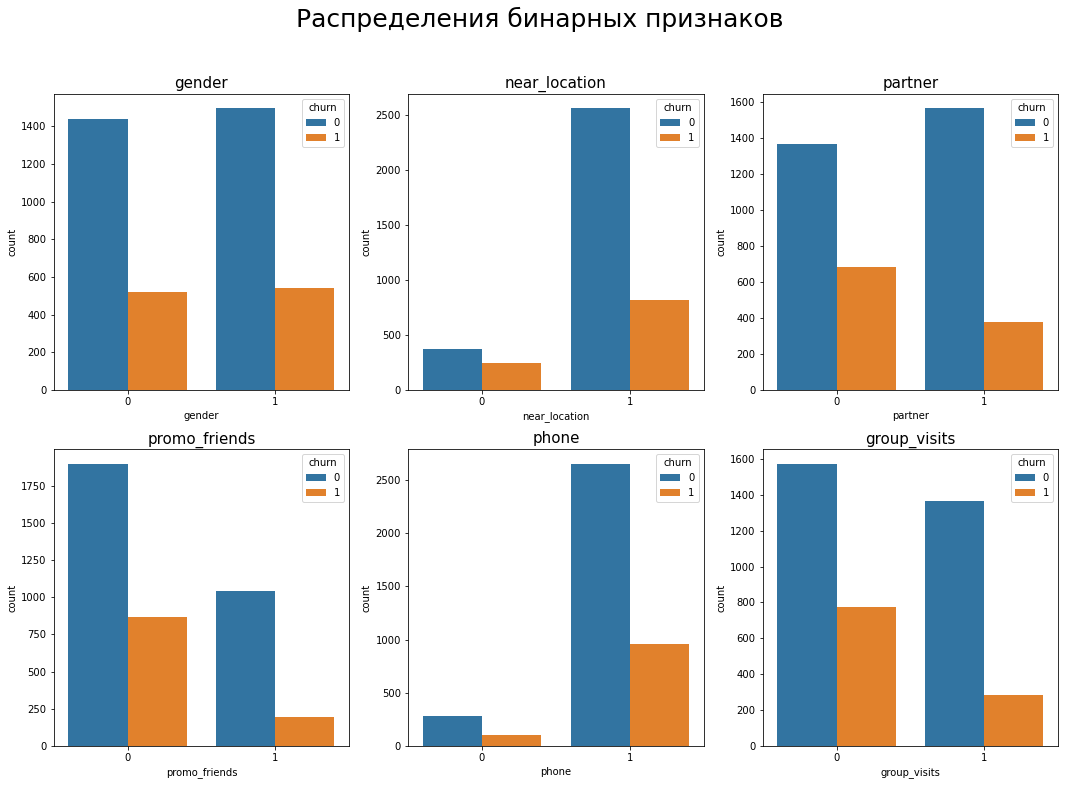

In [6]:
# Построим столбчатые диаграммы и распределения признаков по группам оттока
# для бинарных признаков
fig, axes = plt.subplots(2,3, figsize=(18, 12))
fig.suptitle('Распределения бинарных признаков', fontsize = 25)
axes = axes.flatten()
for i, column in enumerate(['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits']):
    sns.countplot(data=data, x=data[column], hue='churn', ax = axes.flatten()[i])
    axes[i].set_title(column, fontsize = 15)

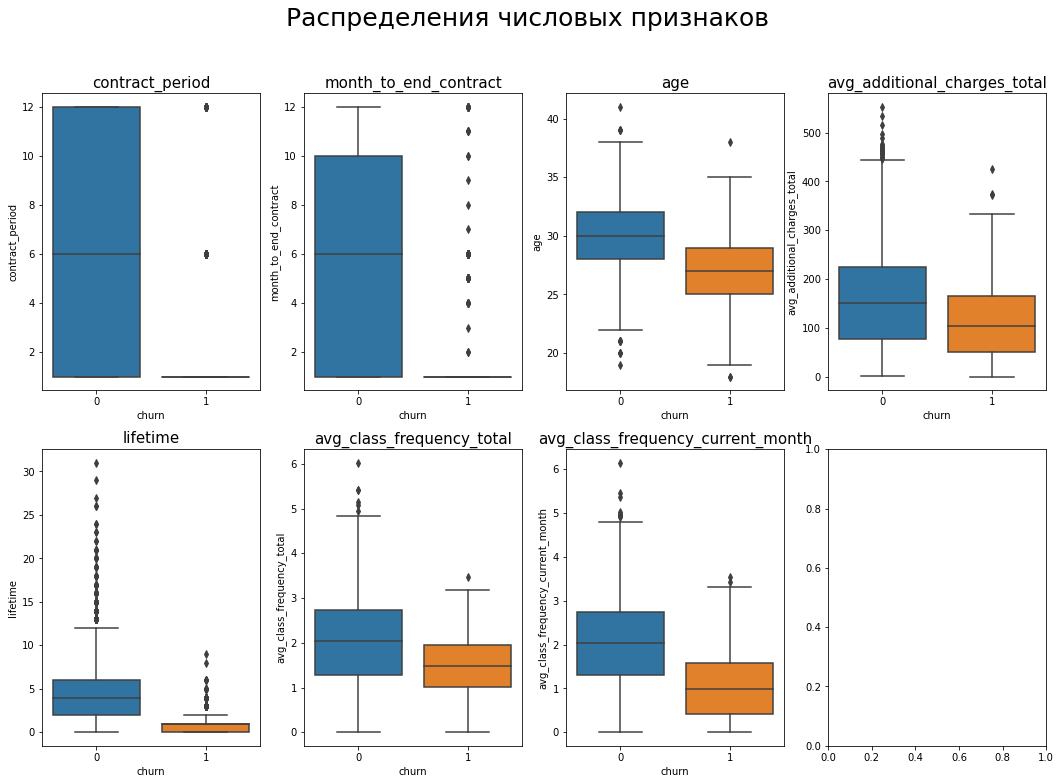

In [7]:
# для числовых признаков
fig, axes = plt.subplots(2,4, figsize=(18, 12))
fig.suptitle('Распределения числовых признаков', fontsize = 25)
axes = axes.flatten()
for i, column in enumerate(['contract_period', 
                            'month_to_end_contract', 
                            'age', 
                            'avg_additional_charges_total', 
                            'lifetime', 
                            'avg_class_frequency_total', 
                            'avg_class_frequency_current_month'
                           ]
                          ):
    sns.boxplot(data=data, y=data[column], x='churn', ax = axes.flatten()[i])
    axes[i].set_title(column, fontsize = 15)

Как и было отмечено ранее, пол не влияет на отток. 
Покидает фитнес-центр чуть больше тех, кто проживает не рядом с ним, кто не учавствует в программах лояльности и реже посещает групповые занятия.
C длительными абонементами на 6 и 12 месяцев уходят в отток меньше, чем с абонементами на 1 месяц. Чем больше месяцев до конца окончания абонемента, тем меньше вероятность ухода клента. Так же замечено, что после 10 месяцев занятий клиенты проявляют лояльность и не попадют в отток.

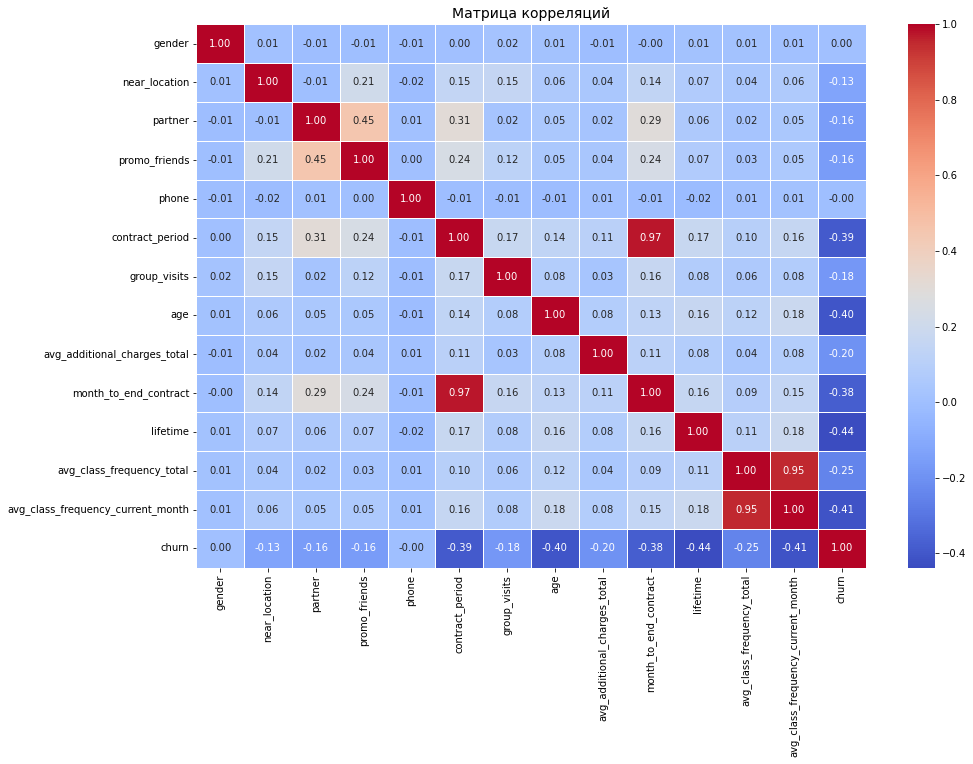

In [8]:
# Построим матрицу корреляций
cm = data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(cm , annot=True, fmt='.2f', linewidths=.5, cmap='coolwarm')
plt.title('Матрица корреляций', fontsize = 14)
plt.show()

Признаки, сильно коррелирующиеся между собой:
* contract_period и month_to_end_contract
* avg_class_frequency_total и avg_class_frequency_current_month

Имеется корреляция между partner и promo_friend. Возможно это связано с тем, что люди учавствующие в программе лояльности чаще зовут друзей.

У признаков gender и phone корреляция с целевой переменной близка к нулю.

Больше всего влиеют на отток: время с момента первого обращения в фитнес-центр, средняя частота посещений в неделю за предыдущий месяц, возраст, длительность абонемента.

In [9]:
# Удалим мультиколлениарные признаки
data = data.drop(['avg_class_frequency_total', 'month_to_end_contract'], axis=1)

Удалили стобцы avg_class_frequency_total и month_to_end_contract во избежание переобучения моделей.

## Модели прогнозирования оттока клиентов

Построим модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце.

In [10]:
# Выделем переменную с признаками и целевую переменную
X = data.drop('churn', axis=1)
y = data['churn']

# Разобьем данные на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Маштабирование данных
scaler = StandardScaler()
scaler.fit(X_train)
X_train_st = scaler.transform(X_train) 
X_test_st = scaler.transform(X_test)

In [11]:
# Обучим модель логистической регрессией
lr_model = LogisticRegression(solver='liblinear', random_state=0)
lr_model.fit(X_train_st, y_train)
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:, 1]

# Обучим модель случайным лесом
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0) 
rf_model.fit(X_train_st, y_train)
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:, 1]

# Смотрим необходимые метрики
print('Метрики LogisticRegression:')
print('Accuracy - {:.2f}'.format(accuracy_score(y_test, lr_predictions)))
print('Precision - {:.2f}'.format(precision_score(y_test, lr_predictions)))
print('Recall - {:.2f}'.format(recall_score(y_test, lr_predictions)))
print('- - - - - - - - - - - - - - - -')
print('Метрики RandomForestRegressor:')
print('Accuracy - {:.2f}'.format(accuracy_score(y_test, rf_predictions)))
print('Precision - {:.2f}'.format(precision_score(y_test, rf_predictions)))
print('Recall - {:.2f}'.format(recall_score(y_test, rf_predictions)))

Метрики LogisticRegression:
Accuracy - 0.90
Precision - 0.79
Recall - 0.82
- - - - - - - - - - - - - - - -
Метрики RandomForestRegressor:
Accuracy - 0.90
Precision - 0.81
Recall - 0.75


Рассчитаем прогнозы с учётом порога, равного 0.3. Сравним метрики при автоматическом расчете и расчете с кастомным порогом.

In [12]:
# Задаем порог
threshold = 0.3

# На основании вероятностей и соотношения классов рассчитаем predict
lr_custom_predictions = [0 if i < threshold else 1 for i in lr_probabilities]
rf_custom_predictions = [0 if i < threshold else 1 for i in rf_probabilities]

# Смотрим необходимые метрики по новому порогу
print('Метрики LogisticRegression с кастомным порогом:')
print('Accuracy - {:.2f}'.format(accuracy_score(y_test, lr_custom_predictions)))
print('Precision - {:.2f}'.format(precision_score(y_test, lr_custom_predictions)))
print('Recall - {:.2f}'.format(recall_score(y_test, lr_custom_predictions)))
print('- - - - - - - - - - - - - - - -')
print('Метрики RandomForestRegressor с кастомным порогом:')
print('Accuracy - {:.2f}'.format(accuracy_score(y_test, rf_custom_predictions)))
print('Precision - {:.2f}'.format(precision_score(y_test, rf_custom_predictions)))
print('Recall - {:.2f}'.format(recall_score(y_test, rf_custom_predictions)))

Метрики LogisticRegression с кастомным порогом:
Accuracy - 0.89
Precision - 0.71
Recall - 0.91
- - - - - - - - - - - - - - - -
Метрики RandomForestRegressor с кастомным порогом:
Accuracy - 0.89
Precision - 0.71
Recall - 0.89


Дополнительно посмотим на roc_auc

In [13]:
print('roc_auc для LogisticRegression: {:.2f}'.format(roc_auc_score(y_test, lr_probabilities)))
print('roc_auc для RandomForestRegressor: {:.2f}'.format(roc_auc_score(y_test, rf_probabilities)))

roc_auc для LogisticRegression: 0.96
roc_auc для RandomForestRegressor: 0.95


Модель логистической регрессии с кастомным порогом обладает самыми высоким показателем Recall, который по моему мнению является важнейшим при распознавании целевого класса. Параметр roc_auc у логистической регрессии так же ближе к 1 и показывает что данная модель более точная. Модель логистической регрессии смотрится лучше.

## Кластеризация клиентов

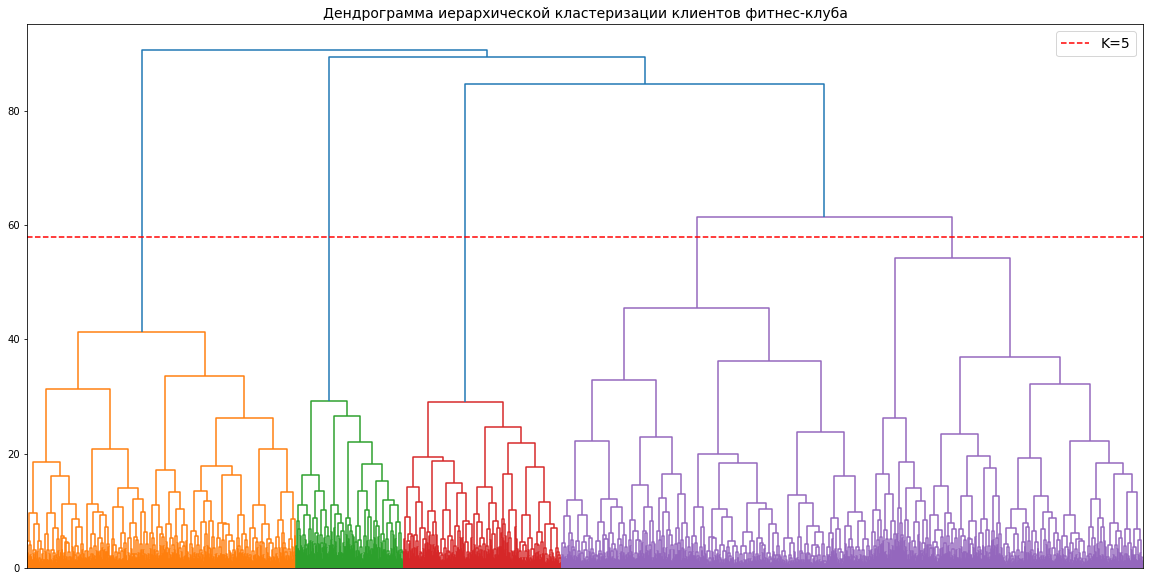

In [14]:
# Стандартизируем данные
sc = StandardScaler()
X_sc = sc.fit_transform(X)

# Строим матрицу расстояний и визуализируем ее дендограммой
linked = linkage(X_sc, method = 'ward') 
plt.figure(figsize=(20, 10))
dendrogram(linked, orientation='top', no_labels=True)
plt.title('Дендрограмма иерархической кластеризации клиентов фитнес-клуба', fontsize = 14)
plt.axhline(y=58, color='red', linestyle='--', label='K=5') 
plt.legend(fontsize = 14)
plt.show()

Дендрограмма предлогает нам оптимальное число кластеров 4 — четыре разных цвета на графике. Последний кластер выглядит довольно большим по сравнению с остальными и его можно разделить на два, тем самым получив 5 кластеров.

In [15]:
# Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов
km = KMeans(n_clusters=5, random_state=0)
km_clusters = km.fit_predict(X_sc)

# Cохраняем метки кластера в поле нашего датасета
data['cluster'] = km_clusters

# Оценим похожесть кластеров метрикой силуэта
df_sc = scaler.fit_transform(data)
silhouette_score(df_sc, km_clusters)

0.1742511198644242

Значение метрики не очень высокое, значит разделение на кластеры не высокого качества.

In [16]:
# Смотрим средние значения признаков для кластеров
df1 = data.groupby('cluster').mean().T
df1['all_mean'] = data.drop('cluster', axis=1).mean()
df1

cluster,0,1,2,3,4,all_mean
gender,0.496447,0.500000,0.500940,0.534260,0.523316,0.510250
near_location,0.995939,0.000000,1.000000,0.996028,0.862694,0.845250
partner,0.892386,0.489247,0.217105,0.379345,0.471503,0.486750
promo_friends,1.000000,0.078853,0.072368,0.009930,0.305699,0.308500
phone,1.000000,1.000000,1.000000,1.000000,0.000000,0.903500
contract_period,6.922843,2.994624,2.010338,6.208540,4.777202,4.681250
group_visits,0.524873,0.232975,0.277256,0.538232,0.427461,0.412250
age,29.606091,28.679211,27.583647,30.699106,29.297927,29.184250
avg_additional_charges_total,153.424651,137.125763,119.339956,176.259567,144.208179,146.943728
lifetime,4.283249,2.974910,1.922932,5.415094,3.940415,3.724750


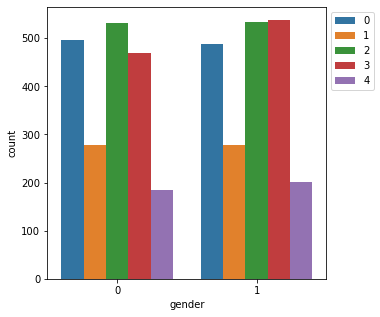

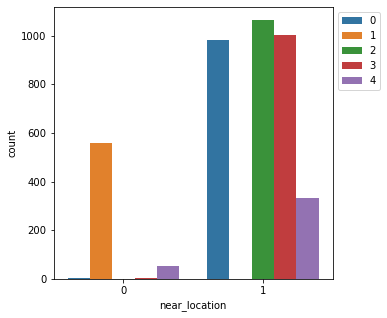

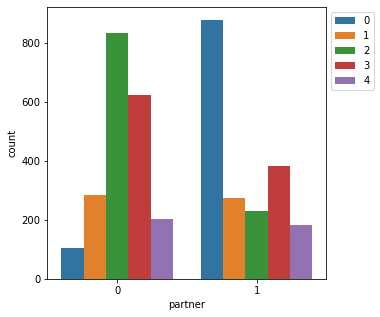

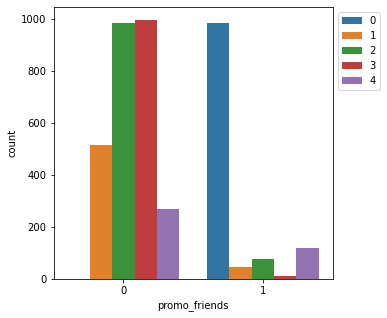

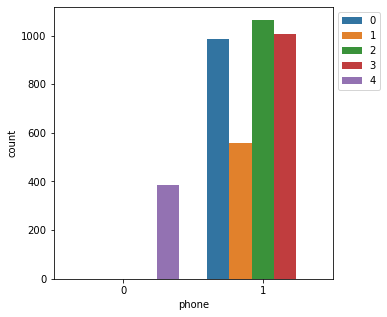

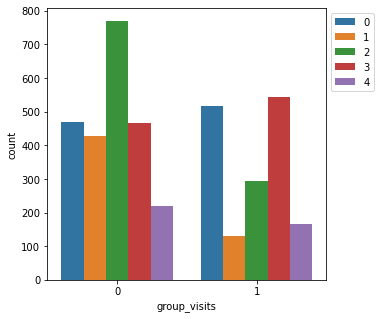

In [17]:
# Распределения бинарных признаков по класстерам
for column in ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits']:
    plt.figure(figsize=(5, 5))
    sns.countplot(data = data, x = data[column], hue = 'cluster')
    plt.legend(bbox_to_anchor = (1,1), loc='upper left')
    plt.show()

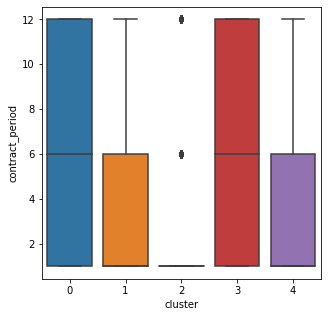

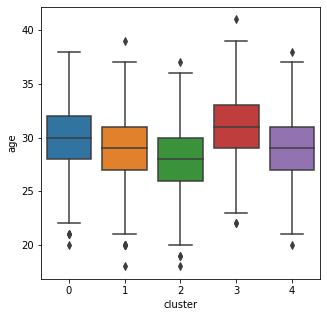

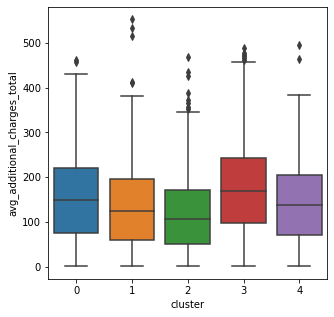

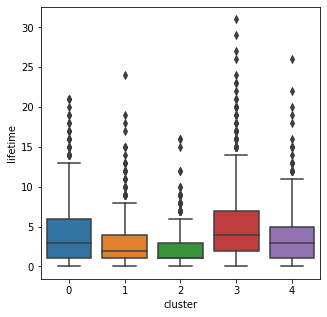

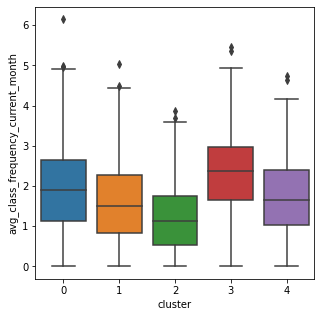

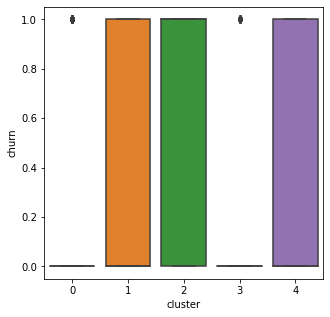

In [18]:
# Распределение числовых признаков по кластерам
for column in [
    'contract_period', 
    'age', 
    'avg_additional_charges_total', 
    'lifetime', 
    'avg_class_frequency_current_month', 
    'churn'
]:
    plt.figure(figsize=(5, 5))
    sns.boxplot(data = data, x = 'cluster', y = data[column])
    plt.show()

<b>Кластер c минимальным оттоком (~2%, Кластер 3):</b>

Все клиенты старше 30 лет, практически все клиенты живут рядом или работают с фитнес-центром, около 1/3 имеют партнерские отношения с центром и почти все сами пришли в фитнес-центр, а не по рекомендации знакомых. Длительность абонемента у этих клиентов высокий - около 6 месяцев как и "срок жизни".
Эти клиенты склонны к посещению групповых занятий и тренеруются более двух раз в неделю. А так же с этих клиентов центр имеет большее всего дополнительных доходов.

<b>Кластер с оттоком немного выше минимального (~12%, Кластер 0):</b>

Средний возраст совсем чуть меньше 30 лет, практически все клиенты так же находятся рядом с фитнес-центром, доля участия в партнерской программе самая высокая и все клиенты пришли по программе "приведи друга". Длительность абонемента высокая - больше 6 месяцев, но "срок жизни" снижается. Все так же высокий процент посещения групповых занятий и среднее число занятий в неделю близко к двум. Дополнительны доходы с этих клиентов немного выше среднего.

<b>Кластер с оттоком около четверти и близким к среднему значению (~27%, Кластер 4):</b>

В большей мере находятся рядом с фитнес-центром, чуть меньше половины имеют партнерские отношения и около трети пришли от друзей. Длительность абонемента, срок до конца и "срок жизни" примерно одинаковые, около 4-4,5 месяцев.
По остальным параметрам клиенты из группы особо не выделяются, значения очень близки к средним. Можно сказать, что они посещают фитнес-центр чуть реже чем клиенты из предыдущих групп. Примечательно, что никто не оставил телефон. 

<b>Кластер с оттоком чуть меньше половины (~40%, Кластер 1):</b>

Средний возраст уже спустился ниже 29 лет. Никто не живет или работает рядом с фитнес-центром, около половины имеют партнерскую программу и рактически никто не учавствует в программе "приведи друга". Средний срок абонимента и "срок жизни" низкий - около трех месяцев, интенсивность занятий в неделю снижается до ~1,5 и очень низкая посещаемость групповых занятий.
    
<b>Лидер по оттоку - больше половины (~56%, Кластер 2):</b>

Средний возраст самый низкий - чуть больше 27 лет. Как не странно все клиенты живут или работают рядом с фитнес-центром. Доля клинетов учавствующих в программах лояльности - самая низкая. Длительность абонемента и "срок жизни" клиента самые низкие - около двух месяцев. Средняя посещаемость в неделю чуть выше 1 занятия, низкая посещаемость групповых занятий и самые низкие дополнительные расходы с этих клиентов.

## Выводы и базовые рекомендации по работе с клиентами

<b>Выводы:</b>

В данной работе были проведены исследовательский анализ данных, построены две модели прогнозирования оттока клиентов и произведена кластеризация клиентов для определения поведенческих групп клиентов и отличительных признаков клиентов из оттока.

В исследовательском анализе данных мы отметили, что на первый взгляд факторами оттока являются:
* молодой возраст
* проживание или работа не рядом с фитнес-центром
* приобретение абонемента на месячный срок
* отсутствие льготных программ
* не посещения групповых занятий
* низкая интенсивность занятий в неделю
* до срока окончания абонемента остается месяц

На основе данных мы обучили две модели по алгоритмам логистической регрессии и случайного леса. Модель логистической регрессии с кастомным порогом на валидационной выборке выдала наилучшие метрики, в дальнейшем для прогнозирования оттока клиентов можно применять именно ее.

Также все клиенты были поделены на кластеры с помощью алгоритмов агломеративной иерархической кластеризации и K-Means.<br> Дополнительно мы отметили, что попавшие в отток имеют:
* средний возраст около 27 лет
* среднюю посещаемость в неделю чуть выше 1 занятия
* самые низкие дополнительные траты около 120 у.е
* низкие срок абонемента и "срок жизни" клиента около 2 месяцев.

<b>Базовые рекомендации:</b>
1. Предлагать оформлять со скидкой абонементы на длительный срок (6 и 12 месяцев) как новым клиентам, так и старым у которых в течение месяца закончится старый абонемент.
2. Стимулировать посещения групповых занятий, например первое посещение бесплатно.
3. Проанализировать старые и добавить новые дополнительные услуги. Рассмотреть изменение ценовой политики в сторону лояльности к клиенту.
4. Разработать новые программы лояльности как для новых так и для старых клиентов.